In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [2]:
#load dataset
df = pd.read_csv(r'C:\Users\Saheed K\OneDrive\Desktop\Project Entri.csv')
df.head()

,Indicator Category,Indicator,Year,Gender,Race/ Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes
0,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2013,Both,All,30.4,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
1,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2012,Both,All,39.6,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
2,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2011,Both,All,41.7,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
3,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Male,All,195.8,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN
4,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Female,All,135.5,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN


In [3]:
#Initial Data Exploration
print("Dataset Shape:", df.shape)
print(df.info())
print(df.describe())
print("Columns:", df.columns)

Dataset Shape: (13512, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Indicator Category          13512 non-null  object 
 1   Indicator                   13512 non-null  object 
 2   Year                        13512 non-null  object 
 3   Gender                      13512 non-null  object 
 4   Race/ Ethnicity             13512 non-null  object 
 5   Value                       13499 non-null  float64
 6   Place                       13512 non-null  object 
 7   BCHC Requested Methodology  13004 non-null  object 
 8   Source                      11222 non-null  object 
 9   Methods                     4232 non-null   object 
 10  Notes                       3541 non-null   object 
dtypes: float64(1), object(10)
memory usage: 1.1+ MB
None
              Value
count  13499.000000
mean     285.688562
std  

In [4]:
#Data Cleaning
columns_to_drop = ['Source', 'Methods', 'Notes', 'BCHC Requested Methodology']
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')
df.dropna(inplace=True)

In [5]:
#Check Missing values 
print(df.isnull().sum())

Indicator Category    0
Indicator             0
Year                  0
Gender                0
Race/ Ethnicity       0
Value                 0
Place                 0
dtype: int64


In [6]:
# Convert 'Year' to numeric
df['Year'] = df['Year'].astype(str).str[:4]
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.dropna(inplace=True)

In [7]:
# Encoding Categorical Columns
cat_cols = ['Indicator Category', 'Indicator', 'Gender', 'Race/ Ethnicity', 'Place']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [9]:
#Visualization

In [10]:
X = df.drop(['Value'], axis=1)
y = df['Value']


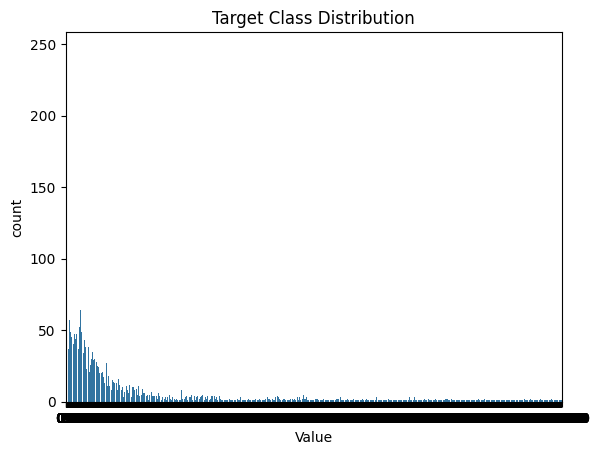

In [11]:
# Count 
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

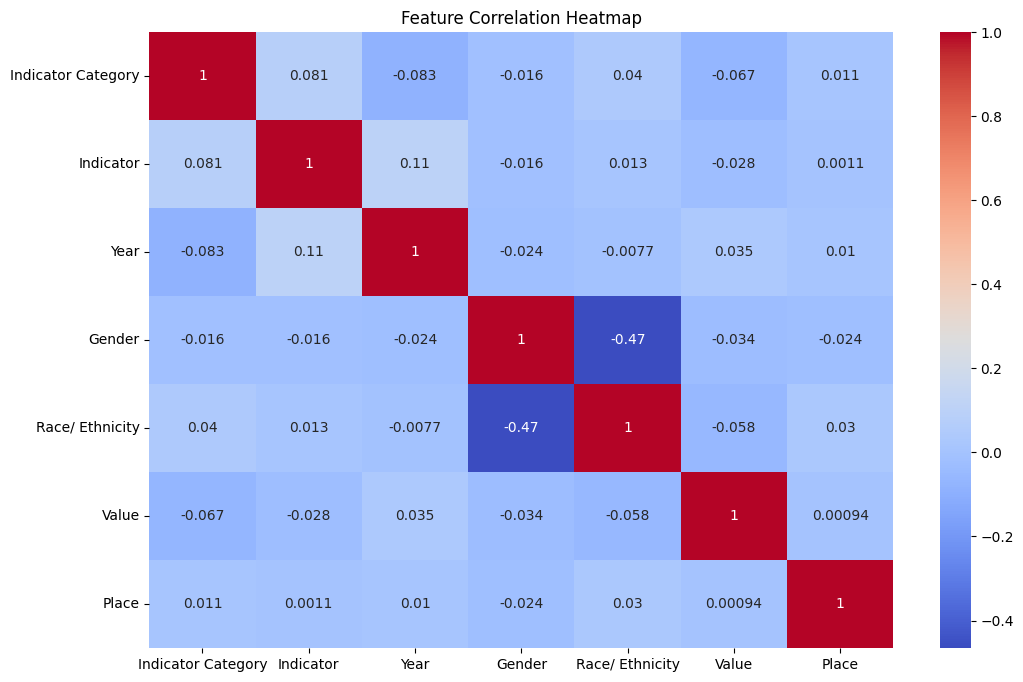

In [12]:
#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

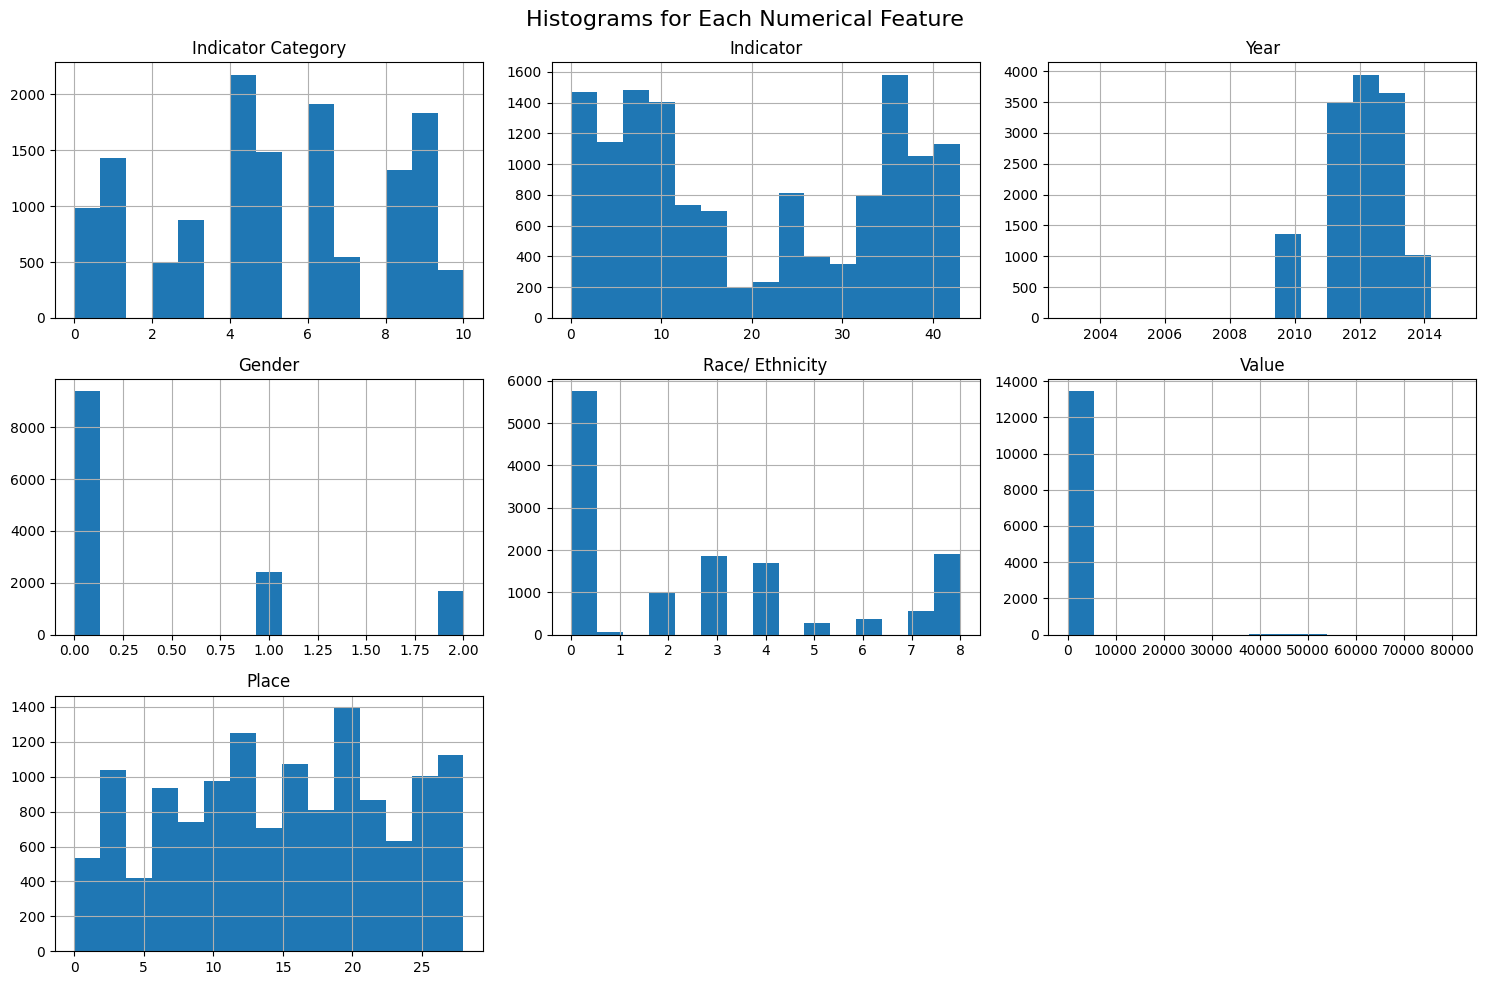

In [13]:
#Histograms
df.select_dtypes(include=['float64', 'int64']).hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms for Each Numerical Feature", fontsize=16)
plt.tight_layout()
plt.show()

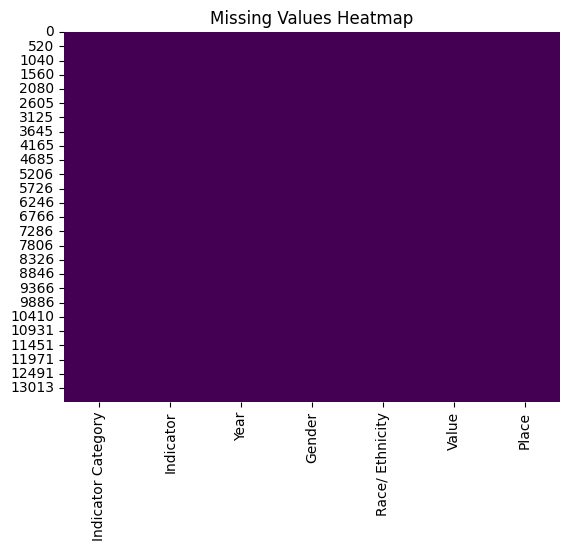

In [14]:
#Missing Values Heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

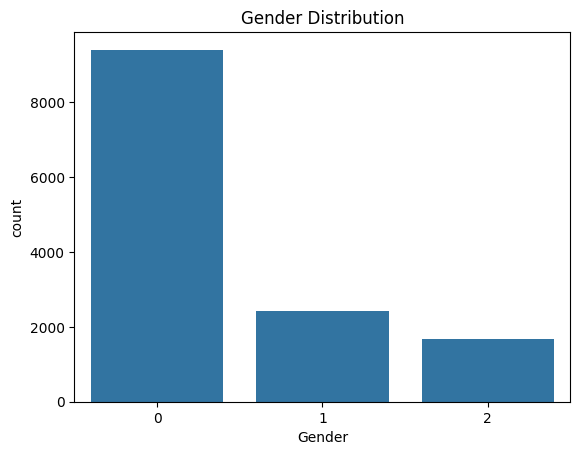

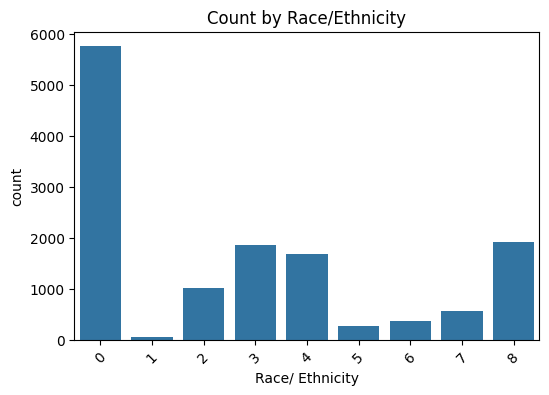

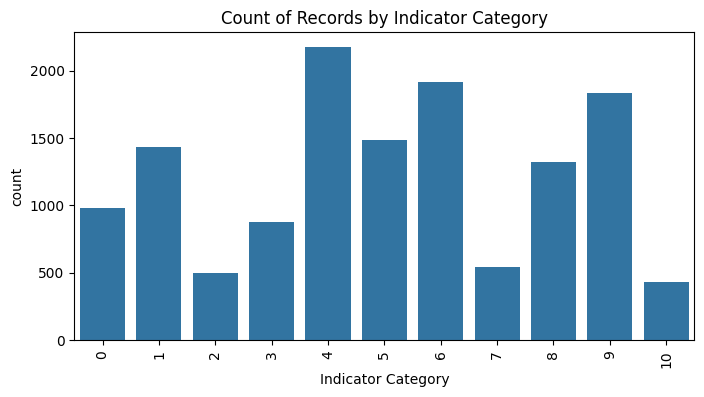

In [15]:
# Count plot for Gender 
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()
# Count plot for Race/ Ethnicity
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Race/ Ethnicity')
plt.title("Count by Race/Ethnicity")
plt.xticks(rotation=45)
plt.show()

# Count plot for Indicator Category
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Indicator Category')
plt.title("Count of Records by Indicator Category")
plt.xticks(rotation=90)
plt.show()

In [16]:
df.nunique().sort_values()#Identify Categorical Features

Gender                   3
Race/ Ethnicity          9
Year                    10
Indicator Category      11
Place                   29
Indicator               44
Value                 2677
dtype: int64

In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Feature Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [19]:
# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

In [20]:
# Print PCA summary
print(f"Original features: {X.shape[1]}")
print(f"Reduced features: {X_pca.shape[1]}")
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

Original features: 6
Reduced features: 6
Explained variance ratio:
[0.24573933 0.18435872 0.17857549 0.16618539 0.13640519 0.08873589]


In [22]:
#Regression Models 
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "Support Vector Regressor (SVR)": SVR()
}

In [25]:
# 1. Train-test evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Test R²: {r2_score(y_test, y_pred):.4f}")


Linear Regression Test R²: 0.0134
Decision Tree Regressor Test R²: 0.9755
Random Forest Regressor Test R²: 0.9657
Gradient Boosting Regressor Test R²: 0.9524
XGBoost Regressor Test R²: 0.9672
KNN Regressor Test R²: 0.5286
Support Vector Regressor (SVR) Test R²: -0.0058


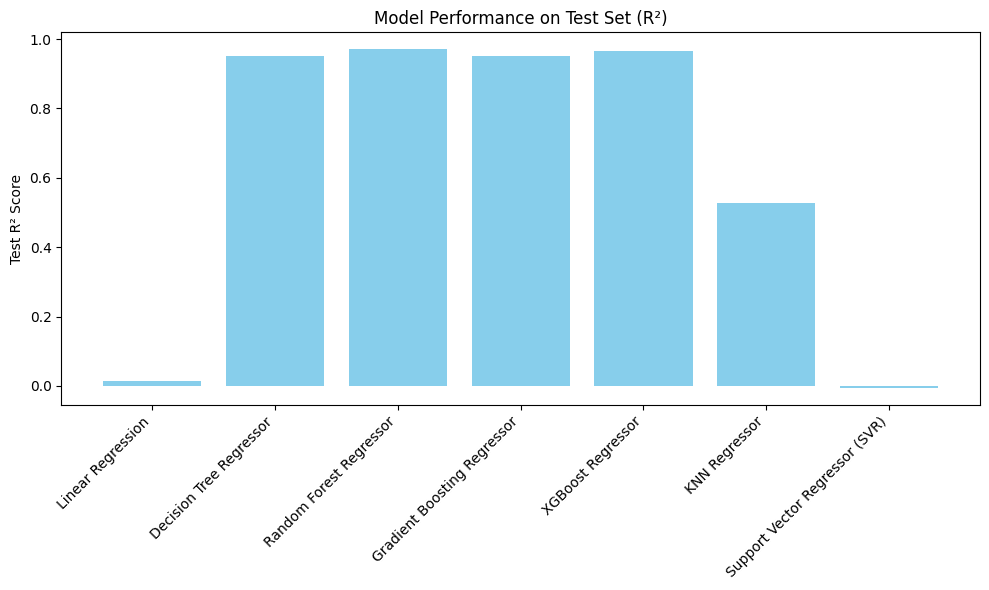

In [30]:
# Step 2: Plotting
plt.figure(figsize=(10, 6))
plt.bar(test_scores.keys(), test_scores.values(), color='skyblue')
plt.ylabel("Test R² Score")
plt.title("Model Performance on Test Set (R²)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# 2. Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name} Cross-Validation R²: {scores.mean():.4f}")

Linear Regression Cross-Validation R²: 0.0120
Decision Tree Regressor Cross-Validation R²: 0.8962
Random Forest Regressor Cross-Validation R²: 0.0088
Gradient Boosting Regressor Cross-Validation R²: 0.7778
XGBoost Regressor Cross-Validation R²: 0.2222
KNN Regressor Cross-Validation R²: -0.1911
Support Vector Regressor (SVR) Cross-Validation R²: -0.0073


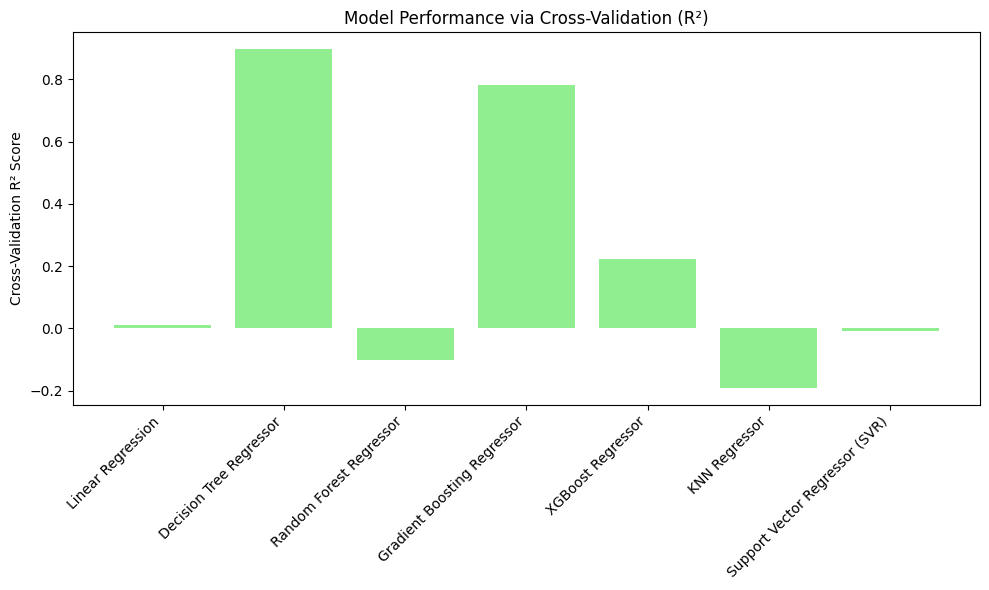

In [32]:
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_scores[name] = scores.mean()

# Step 2: Plotting
plt.figure(figsize=(10, 6))
plt.bar(cv_scores.keys(), cv_scores.values(), color='lightgreen')
plt.ylabel("Cross-Validation R² Score")
plt.title("Model Performance via Cross-Validation (R²)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()